In [ ]:
# import os
# os.chdir(path)   Where (path) is in the format shown from the output of...os.getcwd()

In [ ]:
# MISO has an extensive geographical spread and the data is for many (>2,000?) nodes
# To compare to CAISO we need to identify a hub/Node for comparison to the PGE Node.

In [2]:
import os
print(os.getcwd())

C:\Users\DWWillson\Desktop\CAISO Wind Solar Hourly


In [3]:
os.chdir(C:\Users\DWWillson\Desktop\MISO_Prices)
print(os.getcwd())

SyntaxError: invalid syntax (<ipython-input-3-678f3c452aad>, line 1)

In [7]:
import pandas as pd
df= pd.read_csv('Sep_2018_MISO.csv')
df.head()

,MARKET_DAY,NODE,TYPE,VALUE,HE1,HE2,HE3,HE4,HE5,HE6,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,7/1/2018,AEC,Interface,LMP,22.82,21.90,21.72,21.23,20.84,20.19,...,38.26,36.62,33.88,29.43,33.62,35.89,30.35,26.57,23.95,23.14
1,7/1/2018,AEC,Interface,MCC,0.31,0.02,0.00,0.00,0.00,0.00,...,3.29,2.28,0.84,0.38,0.20,2.68,1.53,0.02,0.02,0.14
2,7/1/2018,AEC,Interface,MLC,-0.29,-0.26,-0.30,-0.29,-0.32,-0.28,...,-0.53,-0.54,-0.46,-0.38,-0.48,-0.42,-0.39,-0.20,-0.08,-0.04
3,7/1/2018,AECI,Interface,LMP,21.38,20.75,20.80,20.33,20.00,19.36,...,30.56,31.69,30.74,27.29,31.64,31.65,27.76,25.21,22.55,21.56
4,7/1/2018,AECI,Interface,MCC,0.00,0.00,0.00,0.00,0.00,0.00,...,-2.07,-0.48,-0.21,-0.08,-0.04,0.00,0.00,-0.01,0.00,0.00


In [6]:
# df['day']= df['MARKET_DAY'].dt.weekday_name #san only use on datetime objects!!
# So first keep as a column and make a datetime object and then later create Hierachical,index with set_index()
# df.head()

In [8]:
df1= pd.read_csv('Sep_2018_MISO.csv', header= 0, parse_dates= ['MARKET_DAY'], index_col= ['NODE','MARKET_DAY'])

In [9]:
df1.head()
# df1.info()

TYPE VALUE    HE1    HE2    HE3    HE4    HE5    HE6  \
NODE MARKET_DAY                                                              
AEC  2018-07-01  Interface   LMP  22.82  21.90  21.72  21.23  20.84  20.19   
     2018-07-01  Interface   MCC   0.31   0.02   0.00   0.00   0.00   0.00   
     2018-07-01  Interface   MLC  -0.29  -0.26  -0.30  -0.29  -0.32  -0.28   
AECI 2018-07-01  Interface   LMP  21.38  20.75  20.80  20.33  20.00  19.36   
     2018-07-01  Interface   MCC   0.00   0.00   0.00   0.00   0.00   0.00   

                   HE7    HE8  ...     HE15   HE16   HE17   HE18   HE19  \
NODE MARKET_DAY                ...                                        
AEC  2018-07-01  20.43  22.49  ...    38.26  36.62  33.88  29.43  33.62   
     2018-07-01   0.02   0.50  ...     3.29   2.28   0.84   0.38   0.20   
     2018-07-01  -0.23  -0.39  ...    -0.53  -0.54  -0.46  -0.38  -0.48   
AECI 2018-07-01  19.37  20.71  ...    30.56  31.69  30.74  27.29  31.64   
     2018-07-01   0.00   0.00  ...    -2.07  -0.48  -0.21  -0.08  -0.04   

                  HE20   HE21   HE22   HE23   HE24  
NODE MARKET_DAY                                     
AEC  2018-07-01  35.89  30.35  26.57  23.95  23.14  
     2018-07-01   2.68   1.53   0.02   0.02   0.14  
     2018-07-01  -0.42  -0.39  -0.20  -0.08  -0.04  
AECI 2018-07-01  31.65  27.76  25.21  22.55  21.56  
     2018-07-01   0.00   0.00  -0.01   0.00   0.00  

[5 rows x 26 columns]

In [10]:
# Hmmm. We might reverse the indices and then do a groupby day and then calculate means?

In [11]:
df_days= pd.read_csv('Sep_2018_MISO.csv', header= 0, parse_dates= ['MARKET_DAY'], index_col= ['MARKET_DAY','NODE'])

In [14]:
df_days.head()
df_days= df_days[df_days['VALUE']== 'LMP']
df_days.head()

TYPE VALUE    HE1    HE2    HE3    HE4    HE5  \
MARKET_DAY NODE                                                                
2018-07-01 AEC            Interface   LMP  22.82  21.90  21.72  21.23  20.84   
           AECI           Interface   LMP  21.38  20.75  20.80  20.33  20.00   
           AECI.ALTW       Loadzone   LMP  21.87  21.16  21.23  20.80  20.47   
           AECI.AMMO       Loadzone   LMP  21.89  21.29  21.26  20.75  20.37   
           AECI.APM_1.AZ        Hub   LMP  21.77  21.20  21.18  20.67  20.27   

                            HE6    HE7    HE8  ...     HE15   HE16   HE17  \
MARKET_DAY NODE                                ...                          
2018-07-01 AEC            20.19  20.43  22.49  ...    38.26  36.62  33.88   
           AECI           19.36  19.37  20.71  ...    30.56  31.69  30.74   
           AECI.ALTW      19.74  19.70  22.96  ...    39.60  35.91  39.27   
           AECI.AMMO      19.66  19.75  21.19  ...    28.98  31.15  30.50   
           AECI.APM_1.AZ  19.56  19.65  21.07  ...    28.98  31.03  30.38   

                           HE18   HE19   HE20   HE21   HE22   HE23   HE24  
MARKET_DAY NODE                                                            
2018-07-01 AEC            29.43  33.62  35.89  30.35  26.57  23.95  23.14  
           AECI           27.29  31.64  31.65  27.76  25.21  22.55  21.56  
           AECI.ALTW      30.36  42.25  33.39  29.01  26.19  23.23  21.99  
           AECI.AMMO      27.44  32.25  32.42  28.24  25.70  22.93  22.01  
           AECI.APM_1.AZ  27.34  32.05  32.19  28.04  25.51  22.77  21.88  

[5 rows x 26 columns]

In [16]:
dfg= df_days.groupby("MARKET_DAY")

In [19]:
dfg.mean() # great! we indeed have all three months so no curtailment due to Excel row limit size!!

,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,HE9,HE10,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
MARKET_DAY,,,,,,,,,,,,,,,,,,,,,
2018-07-01,24.065018,21.842233,22.096572,21.667129,20.915036,20.235652,22.466718,22.361518,28.071408,48.069886,...,32.078833,31.722370,31.230656,28.204686,31.624558,32.390643,28.290023,25.938432,23.369476,22.454485
2018-07-02,21.298122,20.600483,20.119877,19.577151,19.750128,20.304294,21.127397,22.668624,25.048368,29.549389,...,31.730032,34.100360,33.350574,29.911117,55.869667,30.384881,26.670793,25.182366,22.140488,21.481796
2018-07-03,19.961832,19.361919,17.662165,16.815160,17.736604,18.935346,21.295146,23.286759,41.896896,25.430579,...,38.772106,45.078241,37.856048,34.619941,32.562890,34.931012,29.055893,29.569986,22.835128,22.469294
2018-07-04,21.659239,20.053364,19.611212,18.896358,18.448049,18.511545,19.033915,21.727438,23.938911,36.177065,...,44.325647,89.347698,126.465747,39.387434,40.371263,33.799654,26.110469,26.310160,25.876582,23.164417
2018-07-05,18.413040,19.679599,20.950725,20.618336,20.928546,21.322015,22.184116,25.036222,73.304439,33.264275,...,39.254435,57.715451,50.730638,33.174667,29.690706,27.923304,29.701673,27.197302,23.867479,21.957666
2018-07-06,20.745693,19.835438,18.981787,18.395273,18.135474,18.896641,20.076910,21.188336,22.617799,23.105816,...,27.968637,30.494134,26.841896,26.532060,25.335620,23.658204,22.642238,21.756509,20.343842,18.594544
2018-07-07,15.808373,17.156167,13.559444,13.958915,12.319768,12.067853,15.048396,19.443008,23.087434,26.518624,...,28.305333,29.814439,27.132653,25.758829,24.691468,23.366199,22.834234,23.256249,20.792215,19.227010
2018-07-08,14.149385,14.478756,10.002425,9.265547,13.071518,9.067666,14.424840,19.166500,22.716595,21.763820,...,26.724572,28.464576,56.413628,45.797247,33.914298,26.955816,25.726764,24.842074,21.370419,20.564950
2018-07-09,18.206235,16.092999,19.315182,16.729818,18.398633,19.742425,23.396440,22.324562,23.778254,25.368491,...,46.278108,105.984590,67.593838,75.943081,49.808728,58.353970,31.619886,30.247088,24.937448,22.845415


In [78]:
# Need to convert groupby object to a dataframe, and then stack it to make a time series
# then also add a variable day of week (and hour of day)
# can then run CAISO function to get prices with two lowest hours
dfx= dfg.mean()
dfx= dfx.reset_index(level='MARKET_DAY') # dfx.to_frame() : AttributeError: 'DataFrame' object has no attribute 'to_frame'
# dfx= dfx.to_frame()..already a dataframe !!
dfx.head()

,MARKET_DAY,HE1,HE2,HE3,HE4,HE5,HE6,HE7,HE8,HE9,...,HE15,HE16,HE17,HE18,HE19,HE20,HE21,HE22,HE23,HE24
0,2018-07-01,24.065018,21.842233,22.096572,21.667129,20.915036,20.235652,22.466718,22.361518,28.071408,...,32.078833,31.722370,31.230656,28.204686,31.624558,32.390643,28.290023,25.938432,23.369476,22.454485
1,2018-07-02,21.298122,20.600483,20.119877,19.577151,19.750128,20.304294,21.127397,22.668624,25.048368,...,31.730032,34.100360,33.350574,29.911117,55.869667,30.384881,26.670793,25.182366,22.140488,21.481796
2,2018-07-03,19.961832,19.361919,17.662165,16.815160,17.736604,18.935346,21.295146,23.286759,41.896896,...,38.772106,45.078241,37.856048,34.619941,32.562890,34.931012,29.055893,29.569986,22.835128,22.469294
3,2018-07-04,21.659239,20.053364,19.611212,18.896358,18.448049,18.511545,19.033915,21.727438,23.938911,...,44.325647,89.347698,126.465747,39.387434,40.371263,33.799654,26.110469,26.310160,25.876582,23.164417
4,2018-07-05,18.413040,19.679599,20.950725,20.618336,20.928546,21.322015,22.184116,25.036222,73.304439,...,39.254435,57.715451,50.730638,33.174667,29.690706,27.923304,29.701673,27.197302,23.867479,21.957666


In [79]:
# dfx.info() # MARKET_DAY is a datetime object, but not in the index
dfx.columns= ['day', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
dfx.head(2)
#dfx= dfx.reset_index('day')
dfx.head(2)

,day,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2018-07-01,24.065018,21.842233,22.096572,21.667129,20.915036,20.235652,22.466718,22.361518,28.071408,...,32.078833,31.72237,31.230656,28.204686,31.624558,32.390643,28.290023,25.938432,23.369476,22.454485
1,2018-07-02,21.298122,20.600483,20.119877,19.577151,19.750128,20.304294,21.127397,22.668624,25.048368,...,31.730032,34.10036,33.350574,29.911117,55.869667,30.384881,26.670793,25.182366,22.140488,21.481796


In [80]:
type(dfx)
dfx= dfx.set_index(dfx['day'])
dfx.head(2) # Hmm why is day remaining a column??

,day,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
day,,,,,,,,,,,,,,,,,,,,,
2018-07-01,2018-07-01,24.065018,21.842233,22.096572,21.667129,20.915036,20.235652,22.466718,22.361518,28.071408,...,32.078833,31.72237,31.230656,28.204686,31.624558,32.390643,28.290023,25.938432,23.369476,22.454485
2018-07-02,2018-07-02,21.298122,20.600483,20.119877,19.577151,19.750128,20.304294,21.127397,22.668624,25.048368,...,31.730032,34.10036,33.350574,29.911117,55.869667,30.384881,26.670793,25.182366,22.140488,21.481796


In [81]:
dfx= dfx.drop(dfx['day'],axis=1)## ERROR!!
dfx.head(2)

KeyError: "[Timestamp('2018-07-01 00:00:00') Timestamp('2018-07-02 00:00:00')\n Timestamp('2018-07-03 00:00:00') Timestamp('2018-07-04 00:00:00')\n Timestamp('2018-07-05 00:00:00') Timestamp('2018-07-06 00:00:00')\n Timestamp('2018-07-07 00:00:00') Timestamp('2018-07-08 00:00:00')\n Timestamp('2018-07-09 00:00:00') Timestamp('2018-07-10 00:00:00')\n Timestamp('2018-07-11 00:00:00') Timestamp('2018-07-12 00:00:00')\n Timestamp('2018-07-13 00:00:00') Timestamp('2018-07-14 00:00:00')\n Timestamp('2018-07-15 00:00:00') Timestamp('2018-07-16 00:00:00')\n Timestamp('2018-07-17 00:00:00') Timestamp('2018-07-18 00:00:00')\n Timestamp('2018-07-19 00:00:00') Timestamp('2018-07-20 00:00:00')\n Timestamp('2018-07-21 00:00:00') Timestamp('2018-07-22 00:00:00')\n Timestamp('2018-07-23 00:00:00') Timestamp('2018-07-24 00:00:00')\n Timestamp('2018-07-25 00:00:00') Timestamp('2018-07-26 00:00:00')\n Timestamp('2018-07-27 00:00:00') Timestamp('2018-07-28 00:00:00')\n Timestamp('2018-07-29 00:00:00') Timestamp('2018-07-30 00:00:00')\n Timestamp('2018-07-31 00:00:00') Timestamp('2018-08-01 00:00:00')\n Timestamp('2018-08-02 00:00:00') Timestamp('2018-08-03 00:00:00')\n Timestamp('2018-08-04 00:00:00') Timestamp('2018-08-05 00:00:00')\n Timestamp('2018-08-06 00:00:00') Timestamp('2018-08-07 00:00:00')\n Timestamp('2018-08-08 00:00:00') Timestamp('2018-08-09 00:00:00')\n Timestamp('2018-08-10 00:00:00') Timestamp('2018-08-11 00:00:00')\n Timestamp('2018-08-12 00:00:00') Timestamp('2018-08-13 00:00:00')\n Timestamp('2018-08-14 00:00:00') Timestamp('2018-08-15 00:00:00')\n Timestamp('2018-08-16 00:00:00') Timestamp('2018-08-17 00:00:00')\n Timestamp('2018-08-18 00:00:00') Timestamp('2018-08-19 00:00:00')\n Timestamp('2018-08-20 00:00:00') Timestamp('2018-08-21 00:00:00')\n Timestamp('2018-08-22 00:00:00') Timestamp('2018-08-23 00:00:00')\n Timestamp('2018-08-24 00:00:00') Timestamp('2018-08-25 00:00:00')\n Timestamp('2018-08-26 00:00:00') Timestamp('2018-08-27 00:00:00')\n Timestamp('2018-08-28 00:00:00') Timestamp('2018-08-29 00:00:00')\n Timestamp('2018-08-30 00:00:00') Timestamp('2018-08-31 00:00:00')\n Timestamp('2018-09-01 00:00:00') Timestamp('2018-09-02 00:00:00')\n Timestamp('2018-09-03 00:00:00') Timestamp('2018-09-04 00:00:00')\n Timestamp('2018-09-05 00:00:00') Timestamp('2018-09-06 00:00:00')\n Timestamp('2018-09-07 00:00:00') Timestamp('2018-09-08 00:00:00')\n Timestamp('2018-09-09 00:00:00') Timestamp('2018-09-10 00:00:00')\n Timestamp('2018-09-11 00:00:00') Timestamp('2018-09-12 00:00:00')\n Timestamp('2018-09-13 00:00:00') Timestamp('2018-09-14 00:00:00')\n Timestamp('2018-09-15 00:00:00') Timestamp('2018-09-16 00:00:00')\n Timestamp('2018-09-17 00:00:00') Timestamp('2018-09-18 00:00:00')\n Timestamp('2018-09-19 00:00:00') Timestamp('2018-09-20 00:00:00')\n Timestamp('2018-09-21 00:00:00') Timestamp('2018-09-22 00:00:00')\n Timestamp('2018-09-23 00:00:00') Timestamp('2018-09-24 00:00:00')\n Timestamp('2018-09-25 00:00:00') Timestamp('2018-09-26 00:00:00')\n Timestamp('2018-09-27 00:00:00') Timestamp('2018-09-28 00:00:00')\n Timestamp('2018-09-29 00:00:00') Timestamp('2018-09-30 00:00:00')] not found in axis"

In [85]:
dfs= dfx.stack()
dfs[0:30] # 2300 rows, one column
 #dfs= dfs.set_index(['day'])AttributeError: 'Series' object has no attribute 'set_index'
import matplotlib.pyplot as plt
plt.plot(dfs)
plt.show()





AttributeError: 'str' object has no attribute 'toordinal'

In [83]:
dfs.col_names


AttributeError: 'Series' object has no attribute 'col_names'

In [25]:
dfx.mean() # Much lower than CAISO which was around 30 for "wee hours" (but need to gross up for transmission losses??)

HE1     20.643119
HE2     20.241959
HE3     19.783981
HE4     19.472846
HE5     19.666240
HE6     21.395572
HE7     22.949618
HE8     23.700078
HE9     27.121260
HE10    28.223832
HE11    32.686521
HE12    32.346860
HE13    35.157542
HE14    39.518679
HE15    41.023007
HE16    50.875636
HE17    51.434560
HE18    41.274429
HE19    38.881690
HE20    32.443161
HE21    28.979756
HE22    25.712211
HE23    23.479297
HE24    21.889924
dtype: float64

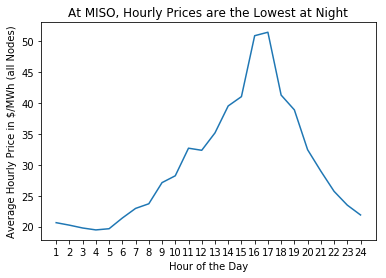

In [101]:
plt.plot(dfx.mean())
plt.title("At MISO, Hourly Prices are the Lowest at Night")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Hourly Price in $/MWh (all Nodes)")
plt.show()

# At MISO the pattern of hourly prices is quite different from at CAISO
Specifically, the lowest prices occur at night (hours Three & Four), and at around $20/MWh are lower than the $30/MWh level at night for CAISO.
At CAISO the lowest prices are mid-morning as the sun rises in the sky, while at MISO mid-morning prices are rising steadily.

In [97]:
dfx.std()

1      1.774000
2      1.440390
3      1.781192
4      1.741808
5      1.641785
6      3.755968
7      4.941486
8      4.100485
9      8.848816
10     6.743220
11    12.937495
12     9.918066
13    14.352275
14    28.663224
15    23.405176
16    32.567497
17    56.536430
18    19.921985
19    22.361168
20     8.088853
21     5.504009
22     5.007016
23     2.003305
24     1.548919
dtype: float64

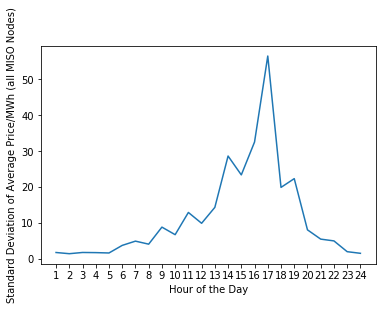

In [98]:
plt.plot(dfx.std())
plt.xlabel('Hour of the Day')
plt.ylabel('Standard Deviation of Average Price/MWh (all MISO Nodes)')
plt.show()

# At MISO, the standard deviation of prices at night is even lower than at CAISO
But at CAISO and MISO the night prices are the least volatile, with the volatility broadly increasing in proprtion to prices.

<function matplotlib.pyplot.show(*args, **kw)>

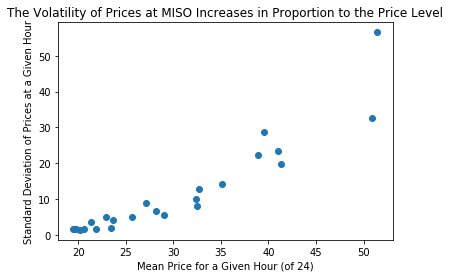

In [99]:
plt.scatter(dfx.mean(), dfx.std())
plt.title("The Volatility of Prices at MISO Increases in Proportion to the Price Level")
plt.ylabel('Standard Deviation of Prices at a Given Hour')
plt.xlabel("Mean Price for a Given Hour (of 24)")
plt.show

In [29]:
dfs= dfx.stack()
dfs= dfs.reset_index()
dfs.head(30)

,level_0,level_1,0
0,0,MARKET_DAY,2018-07-01 00:00:00
1,0,HE1,24.065
2,0,HE2,21.8422
3,0,HE3,22.0966
4,0,HE4,21.6671
5,0,HE5,20.915
6,0,HE6,20.2357
7,0,HE7,22.4667
8,0,HE8,22.3615
9,0,HE9,28.0714


In [12]:
# NOW WE HAVE THE FULL 90 ODD DAYS for the three monthsn
LMP_nodes = LMP.sort_values(['NODE','MARKET_DAY'])
LMP_nodes.head(95) #Hmm we have just the first month!! August and September are absent!!


TYPE VALUE    HE1    HE2    HE3    HE4    HE5    HE6  \
NODE MARKET_DAY                                                              
AEC  2018-07-01  Interface   LMP  22.82  21.90  21.72  21.23  20.84  20.19   
     2018-07-02  Interface   LMP  21.84  21.23  20.78  20.23  20.34  20.88   
     2018-07-03  Interface   LMP  20.41  19.90  18.76  17.37  18.09  19.59   
     2018-07-04  Interface   LMP  22.16  20.87  20.25  19.62  19.05  18.96   
     2018-07-05  Interface   LMP  23.03  22.11  21.37  21.05  21.32  21.66   
     2018-07-06  Interface   LMP  21.35  20.41  19.58  19.00  18.74  19.53   
     2018-07-07  Interface   LMP  19.40  18.23  17.49  15.83  13.48  13.49   
     2018-07-08  Interface   LMP  19.04  18.34  17.78  16.94  15.27  10.65   
     2018-07-09  Interface   LMP  19.09  17.08  21.39  17.24  18.78  19.85   
     2018-07-10  Interface   LMP  21.35  20.70  20.23  19.33  19.23  20.73   
     2018-07-11  Interface   LMP  21.44  20.98  20.33  20.11  20.30  20.75   
     2018-07-12  Interface   LMP  20.34  19.31  19.00  18.74  18.84  20.05   
     2018-07-13  Interface   LMP  21.78  21.04  20.41  20.34  20.84  21.55   
     2018-07-14  Interface   LMP  23.01  22.28  21.16  20.70  20.19  20.25   
     2018-07-15  Interface   LMP  22.65  21.55  21.09  20.61  20.11  19.60   
     2018-07-16  Interface   LMP  22.10  21.44  20.97  20.72  21.03  22.42   
     2018-07-17  Interface   LMP  22.21  21.75  21.48  21.09  20.89  21.65   
     2018-07-18  Interface   LMP  21.29  20.63  20.03  19.74  20.01  20.60   
     2018-07-19  Interface   LMP  19.88  18.79  18.51  18.37  18.14  19.64   
     2018-07-20  Interface   LMP  20.02  19.10  18.60  18.84  19.15  20.07   
     2018-07-21  Interface   LMP  22.18  21.29  20.60  20.61  19.70  19.94   
     2018-07-22  Interface   LMP  20.06  19.40  19.29  17.90  17.40  17.67   
     2018-07-23  Interface   LMP  21.62  20.90  20.53  20.04  20.90  21.52   
     2018-07-24  Interface   LMP  22.15  21.35  20.99  20.50  20.78  21.73   
     2018-07-25  Interface   LMP  21.78  21.08  20.42  20.08  19.93  20.60   
     2018-07-26  Interface   LMP  21.30  20.85  20.20  19.71  19.84  20.23   
     2018-07-27  Interface   LMP  21.79  20.40  19.83  19.79  19.76  20.74   
     2018-07-28  Interface   LMP  21.82  21.26  21.15  20.88  20.59  20.40   
     2018-07-29  Interface   LMP  20.32  19.93  20.07  19.43  18.84  18.70   
     2018-07-30  Interface   LMP  21.13  20.72  19.74  19.91  20.34  21.14   
...                    ...   ...    ...    ...    ...    ...    ...    ...   
     2018-09-04  Interface   LMP  21.41  20.83  20.67  20.88  21.07  23.25   
     2018-09-05  Interface   LMP  22.24  21.50  21.05  21.08  21.35  22.34   
     2018-09-06  Interface   LMP  22.49  21.51  20.51  20.64  21.41  24.04   
     2018-09-07  Interface   LMP  21.74  21.36  21.22  21.24  21.33  22.33   
     2018-09-08  Interface   LMP  21.82  22.31  21.54  21.16  20.25  21.40   
     2018-09-09  Interface   LMP  21.30  21.25  20.45  19.67  19.46  19.15   
     2018-09-10  Interface   LMP  20.56  19.33  18.63  18.29  19.98  21.20   
     2018-09-11  Interface   LMP  21.04  20.35  20.10  19.72  20.30  24.90   
     2018-09-12  Interface   LMP  20.01  20.40  20.57  20.07  20.05  23.47   
     2018-09-13  Interface   LMP  20.43  20.00  19.20  19.50  19.85  28.47   
     2018-09-14  Interface   LMP  22.29  21.61  20.93  20.96  21.37  22.96   
     2018-09-15  Interface   LMP  23.91  23.09  22.44  22.10  21.83  22.24   
     2018-09-16  Interface   LMP  22.41  21.40  20.11  19.19  18.61  19.07   
     2018-09-17  Interface   LMP  21.35  20.85  20.24  20.50  21.26  24.64   
     2018-09-18  Interface   LMP  22.60  22.05  21.61  21.37  21.43  23.10   
     2018-09-19  Interface   LMP  24.28  23.26  22.68  22.27  22.14  23.93   
     2018-09-20  Interface   LMP  21.72  21.50  21.01  20.75  21.29  22.59   
     2018-09-21  Interface   LMP  22.95  22.26  21.34  20.85  21.58  29.15   
     2018-09-22  Interface   LMP  23.81  23.

In [13]:
LMP_nodes.dtypes.index
LMP_nodes.head()


TYPE VALUE    HE1    HE2    HE3    HE4    HE5    HE6  \
NODE MARKET_DAY                                                              
AEC  2018-07-01  Interface   LMP  22.82  21.90  21.72  21.23  20.84  20.19   
     2018-07-02  Interface   LMP  21.84  21.23  20.78  20.23  20.34  20.88   
     2018-07-03  Interface   LMP  20.41  19.90  18.76  17.37  18.09  19.59   
     2018-07-04  Interface   LMP  22.16  20.87  20.25  19.62  19.05  18.96   
     2018-07-05  Interface   LMP  23.03  22.11  21.37  21.05  21.32  21.66   

                   HE7    HE8  ...     HE15   HE16    HE17   HE18   HE19  \
NODE MARKET_DAY                ...                                         
AEC  2018-07-01  20.43  22.49  ...    38.26  36.62   33.88  29.43  33.62   
     2018-07-02  21.59  23.42  ...    33.15  35.62   34.69  30.60  59.51   
     2018-07-03  21.52  23.60  ...    33.84  32.83   30.65  32.25  30.91   
     2018-07-04  19.43  22.00  ...    48.98  99.53  129.50  40.68  41.77   
     2018-07-05  22.52  26.12  ...    43.57  68.49   52.20  32.51  29.69   

                  HE20   HE21   HE22   HE23   HE24  
NODE MARKET_DAY                                     
AEC  2018-07-01  35.89  30.35  26.57  23.95  23.14  
     2018-07-02  30.58  27.20  26.25  22.71  21.70  
     2018-07-03  30.48  28.93  29.16  22.95  23.09  
     2018-07-04  31.74  26.81  27.12  26.58  23.77  
     2018-07-05  27.98  31.12  27.70  24.32  22.64  

[5 rows x 26 columns]

In [ ]:
LMP_nodes['av_daily_price'] = LMP_nodes.mean(axis=1)
LMP_nodes.head()
#monthly_mean_price= LMP_nodes.groupby("NODE")  # .mean("av_daily_price")
#monthly_mean_price["av_daily_price"].mean()
#monthly_mean_price.head()
# len(monthly_mean_price)# 2215 is the number of nodes
# monthly_mean_price.head()

In [ ]:
# Having created an average daily price column we now see whether it differs by the day of the week (and Weekend versus week days)
# First we must extract the relevant day of the week from the DateTime object
LMP_nodes['day']= LMP_nodes['MARKET_DAY'].dt.weekday_name
# MARKET_DAY is no longer a column but rather part of a hierarchical index and so must be accessed differently
# DataFrame with hierarchical index    data.groupby(['col1', 'col2']).mean()
LMP_nodes.head(3)



In [ ]:
g= LMP_nodes.groupby("NODE")
mp= g["av_daily_price"].mean() # this derives the mean price for the quarter as the mean of the average daily price column created
mp.head()

In [ ]:
mp_df= mp.to_frame()
# it seems that groupby objects cant be sorted, so we make a df to enable sorting to find the lowest average prices for that quarter
mp_df.head()

In [ ]:
# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
mp_df= mp_df.rename(columns = {"av_daily_price":"av_q_price"})
mp_df.head()

In [ ]:
mp_df.sort_values("av_q_price", inplace=True)
mp_df.head(40)


In [ ]:
# we now take a look at the Node with the lowest average price (of some 2100 Nodes) for that quarter
LMP_nodes.loc['OTP.COURTNY.WF'].head(40)
COURTNY = LMP_nodes.loc['OTP.COURTNY.WF'].drop(['TYPE','VALUE','av_daily_price'], axis=1)
COURTNY.head(5)
# COURTNY.shape # (92,24) = 2208 hours so range(2208)


In [ ]:
COURTNY= COURTNY.stack() # now have prices in a single column but Index is not continuous: may need to reindex as hourly range()
COURTNY= COURTNY.reset_index()
COURTNY.head()

# import matplotlib as plt
# plt.plot(COURTNY)
# plt.show()

In [ ]:
COURTNY.columns


In [ ]:
# df.rename({'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'}, axis='columns')
COURTNY= COURTNY.rename({'MARKET_DAY':'date', 'level_1':'hour', 0:'price'}, axis= 'columns')
COURTNY.head()

In [ ]:
COURTNY.info()
# date is already a datetime object, but only days (no hours)
# to incorporate the hour, perhaps convert date back to a string and then create a new daytime object with date and hour?

In [ ]:
gCOU= COURTNY.groupby('hour')
gCOU.mean() # unlike for CA we now see very large differences in the average price for different hours for this Node
# the Hours of 1am, 2am, 3am are each just 1.3 cents/kwh compared to 3.5 cents for 5pm (so more than a 2.5x differential)


In [ ]:
# We now seek to explore whether a large difference also exists for the weekend (Saurday & Sunday) cersus the weekdays
# First we need to map from the existing DateTime object to the days of the week as set forth below:
COURTNY['day']= COURTNY['date'].dt.weekday_name
COURTNY.head(3)
# COURTNY.info()

In [ ]:
gCOU_day= COURTNY.groupby('day')


In [ ]:
gCOU_day.mean() # again we see significant differences with the two weekend days having much lower average prices at COURTNY

In [ ]:
import matplotlib.pyplot as plt
plt.plot(COURTNY.index, COURTNY['price'])
# set y limits
# ylim((-50, 125))
# set_ylim(bottom= -100, top= 125) #NameError: name 'set_ylim' is not defined
# axes.set_ylim(-100, 150)  # NameError: name 'axes' is not defined
plt.axes([0,-5, 0.85, 0.5])
plt.show()

In [ ]:
JulAug = COURTNY.iloc[0:1500, :] # redone for just the first 1500 hours to avoid the scale problems due to the spike near 1800
JulAug.shape
plt.plot(JulAug.index, JulAug['price'])
plt.show()
                

In [ ]:
JulAug.plot(y= 'price', kind='hist', bins=30, density= True)


In [ ]:
JulAug.plot(y= 'price', kind= 'hist', bins= 30, cumulative= True) # roughly 100 of 1500 hours have negative prices

In [ ]:
COURTNY_negative= COURTNY.price < 0
COURTNY_negative.sum() # 122

In [ ]:
LMPh= LMP.drop(['TYPE','VALUE'], axis=1) # df.drop(['B', 'C'], axis=1) KeyError: "['TYPE' 'VALUE'] not found in axis"
# LMP_nodes["NODE"]= LMP_nodes["NODE"].astype('category')# ALREADY AN INDEX SO CANNOT MAKE A CATEGORICAL VARIABLE!!!
LMPh.head()
# negative = LMP_nodes < 0
# negative.head()

In [ ]:
negative= LMPh < 0
negative.head()
# negative.shape # (202268, 24) as desired! 92 days x 2199 nodes

In [ ]:
negative.info()


In [ ]:
negative['Total'] = negative.sum(axis=1) # this is summing horizonatlly THEN vertically
negative['Total'].head(30)
negative['Total'].sum() # 114,500
percent_negative= negative['Total'].sum()*100/(202268 * 24)
percent_negative

In [ ]:
average_negative_per_quarter_per_node = percent_negative * 0.01 * 92 * 24
average_negative_per_quarter_per_node 
# This is 104, which is broadly similar to the 123 figure for the Node with the lowest average price!!